## Import libraries

In [1]:
import kagglehub
import shutil
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import dataset from kaggle 

In [2]:


# Downloading from Kagglehub
cached_path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
print("Cached path:", cached_path)

# Choosinf my own folder to copy files to
target_folder = r"D:\AD_Lab\datasets\penguins_dataset"

# Creating folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

# Copy all files from cache → my desired folder
for file_name in os.listdir(cached_path):
    src = os.path.join(cached_path, file_name)
    dst = os.path.join(target_folder, file_name)
    shutil.copy(src, dst)

print("Dataset copied to:", target_folder)


Cached path: C:\Users\Shubh Agnihotri\.cache\kagglehub\datasets\parulpandey\palmer-archipelago-antarctica-penguin-data\versions\1
Dataset copied to: D:\AD_Lab\datasets\penguins_dataset


## Dataset loading using Pandas, not seaborn


In [3]:


df = pd.read_csv(r"D:\AD_Lab\datasets\penguins_dataset\penguins_size.csv")
print(df.head())
print(df.info())

# sns.set(style="whitegrid", palette="muted", context="notebook") for sns (seaborn) style

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null 

## Handling Missing Values

In [4]:
# Cell 4 — Handling missing values

# Check missing values (count)
print("Missing values per column:")
print(df.isna().sum())

# Check missing values in percentage
print("\nMissing percentage:")
print(df.isna().mean() * 100)

# Handling missing values
# Numeric columns → fill with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Categorical columns → fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric missing values
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter handling missing values:")
print(df.isna().sum())


Missing values per column:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Missing percentage:
species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

After handling missing values:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## Encoding Categorical Data

In [5]:
# Cell 5 — Encoding categorical data

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# ---- Label Encoding ----
# Convert text labels into numeric category codes
df_label_encoded = df.copy()
for col in categorical_cols:
    df_label_encoded[col] = df_label_encoded[col].astype('category').cat.codes

print("\nLabel Encoded DataFrame:")
print(df_label_encoded.head())


# ---- One-Hot Encoding ----
# Turns each category into its own 0/1 column
df_onehot = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nOne-Hot Encoded DataFrame:")
print(df_onehot.head())
print("\nShape after one-hot encoding:", df_onehot.shape)


Categorical columns: ['species', 'island', 'sex']

Label Encoded DataFrame:
   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2             39.10             18.7              181.0   
1        0       2             39.50             17.4              186.0   
2        0       2             40.30             18.0              195.0   
3        0       2             44.45             17.3              197.0   
4        0       2             36.70             19.3              193.0   

   body_mass_g  sex  
0       3750.0    2  
1       3800.0    1  
2       3250.0    1  
3       4050.0    2  
4       3450.0    1  

One-Hot Encoded DataFrame:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0             39.10             18.7              181.0       3750.0   
1             39.50             17.4              186.0       3800.0   
2             40.30             18.0              195.0       3250.0   
3             44.45

## Feature Scaling

In [6]:
# Cell 6 — Feature Scaling

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(numeric_cols))

# ----- 1. Standard Scaling (Z-score normalization) -----
df_standard_scaled = df.copy()
df_standard_scaled[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

print("\nStandard Scaled Data (first 5 rows):")
print(df_standard_scaled[numeric_cols].head())


# ----- 2. Min-Max Scaling (0 to 1 range) -----
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

print("\nMin-Max Scaled Data (first 5 rows):")
print(df_minmax_scaled[numeric_cols].head())


# Save scaled versions if needed later
df_standard_scaled.to_csv(r"D:\AD_Lab\datasets\penguins_dataset\penguins_standard_scaled.csv", index=False)
df_minmax_scaled.to_csv(r"D:\AD_Lab\datasets\penguins_dataset\penguins_minmax_scaled.csv", index=False)

print("\nFeature scaling completed and saved.")


Numeric columns: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

Standard Scaled Data (first 5 rows):
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.886331         0.786144          -1.418475    -0.563804
1         -0.812853         0.125931          -1.061939    -0.501280
2         -0.665896         0.430645          -0.420174    -1.189041
3          0.096440         0.075145          -0.277559    -0.188662
4         -1.327200         1.090858          -0.562788    -0.938946

Min-Max Scaled Data (first 5 rows):
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0          0.254545         0.666667           0.152542     0.291667
1          0.269091         0.511905           0.237288     0.305556
2          0.298182         0.583333           0.389831     0.152778
3          0.449091         0.500000           0.423729     0.375000
4          0.167273         0.738095           0.355932     0.208333

Fea

## Plotting the histogram

For basic histogram (Frequency vs Body mass,20 interval size)

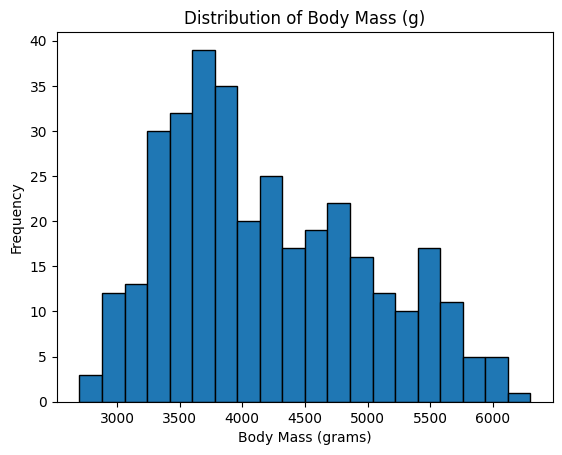

In [7]:
plt.hist(df['body_mass_g'], bins=20, edgecolor='black')
plt.title("Distribution of Body Mass (g)")
plt.xlabel("Body Mass (grams)")
plt.ylabel("Frequency")
plt.show()

For pretty-looking histogram (count vs body mass, 30 interval size)

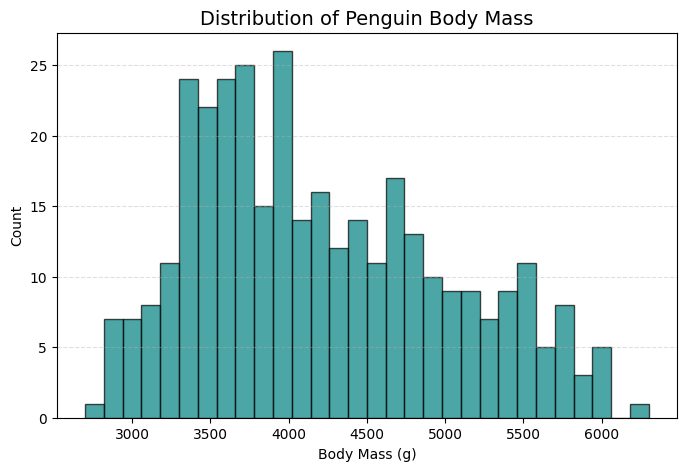

In [8]:

plt.figure(figsize=(8,5))
plt.hist(df['body_mass_g'], bins=30, alpha=0.7, color='teal', edgecolor='black')
plt.title("Distribution of Penguin Body Mass", fontsize=14)
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


## Creating scatter plots

Example 1:
Relationship between flipper length and body mass

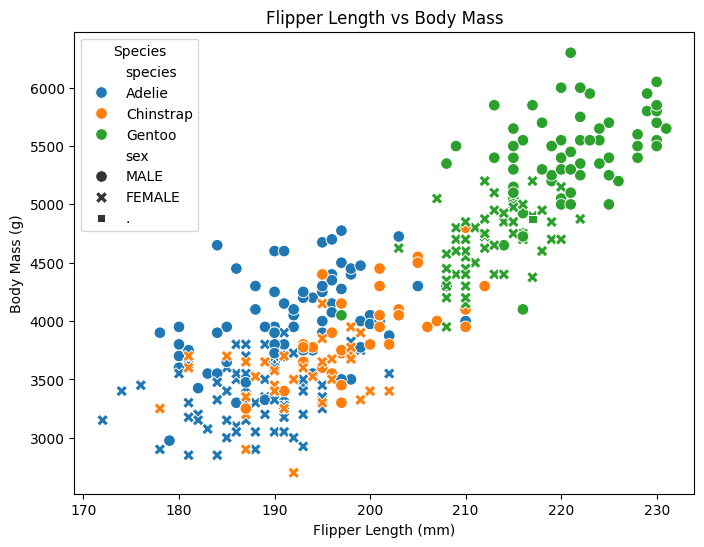

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",      # color points by species
    style="sex",        # optional: different markers for male/female
    s=70                # point size
)

plt.title("Flipper Length vs Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.show()

Example 2: Culmen length vs culmen depth

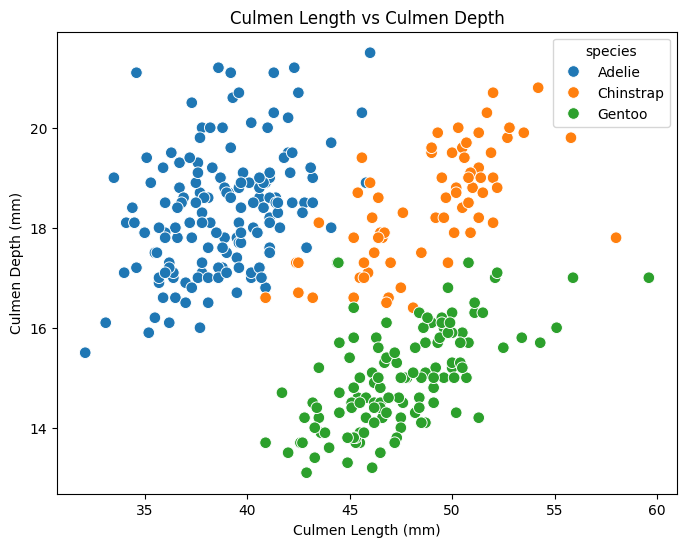

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="culmen_length_mm",
    y="culmen_depth_mm",
    hue="species",
    s=70
)

plt.title("Culmen Length vs Culmen Depth")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.show()


Example 3: Use sex as hue instead of species

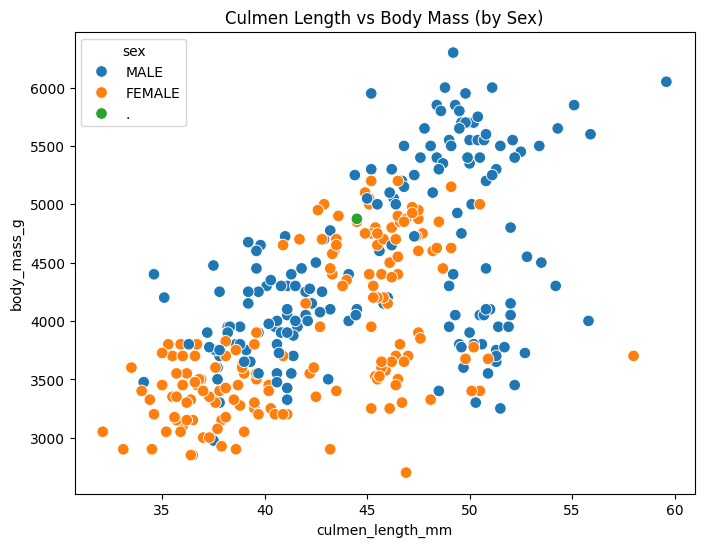

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="culmen_length_mm",
    y="body_mass_g",
    hue="sex",
    s=70
)

plt.title("Culmen Length vs Body Mass (by Sex)")
plt.show()


## Heatmap

Basic and clean heatmap

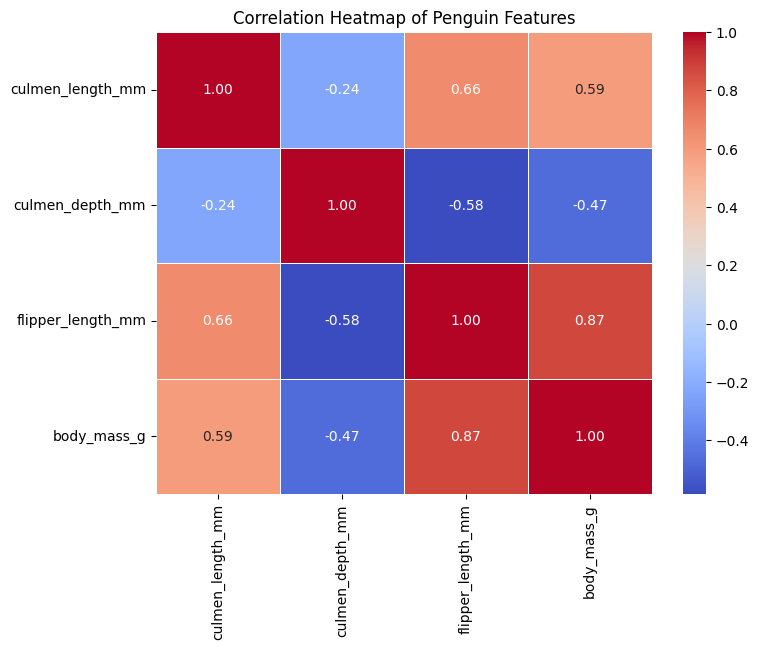

In [12]:
# Selecting only numerical columns
num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

# Computing correlation matrix
corr = df[num_cols].corr()

# Plot tingheatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Penguin Features")
plt.show()

Colourful (Lower Triangle only)

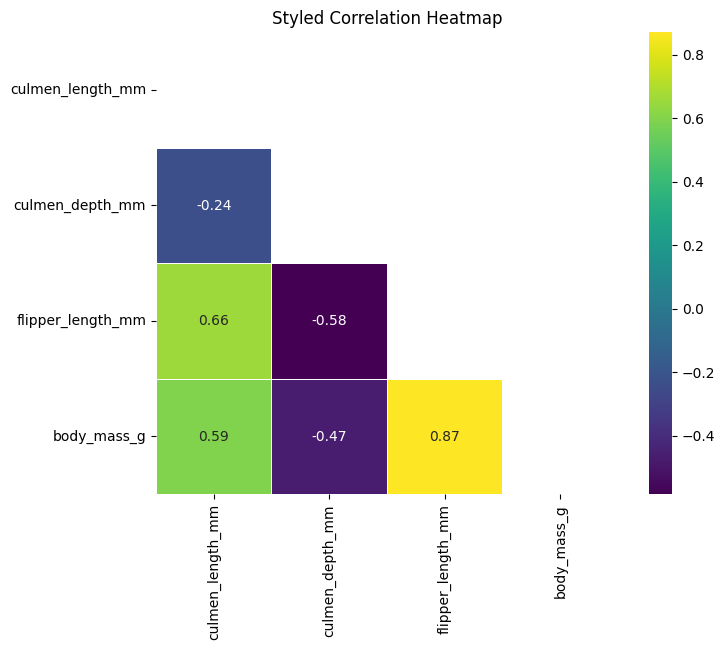

In [13]:


mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="viridis", mask=mask, fmt=".2f",
            linewidths=0.5, square=True)
plt.title("Styled Correlation Heatmap")
plt.show()
